In [1]:
# 📦 Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import sys
# Ajouter le dossier src au path
sys.path.append(str(Path().resolve().parent / "src"))
sns.set(style="whitegrid")

from collaborative_filtering import (
    get_similar_movies_pearson,
    get_similar_movies_cosine
    )
from data_preprocessing import (
    load_data,
    compute_density,
    compute_sparsity,
)

# Revenir au dossier racine du projet
project_root = Path().resolve().parent
data_dir = project_root / "data"
# 🔄 Chargement des données
movie_genres, ratings, user_movie_matrix, movies = load_data(    
    movies_path=str(data_dir / "u.item"),
    ratings_path=str(data_dir / "u.data")
    )

Taux de remplissage (density) : 0.0635
Sparsité (sparsity) : 0.9365


In [2]:
# Dimensions des données
print(f"💾 ratings: {ratings.shape[0]} lignes, {ratings.shape[1]} colonnes")
print(f"🎬 movie_genres: {movie_genres.shape[0]} films, {movie_genres.shape[1]} colonnes")

# Premier aperçu
print("\n🎯 Aperçu de ratings:")
display(ratings.head())

print("\n🎯 Aperçu de movie_genres:")
display(movie_genres.head())

💾 ratings: 100000 lignes, 5 colonnes
🎬 movie_genres: 1682 films, 21 colonnes

🎯 Aperçu de ratings:


,user_id,movie_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)



🎯 Aperçu de movie_genres:


,movie_id,title,unkown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# Types de données et valeurs manquantes
print("🧮 Types et valeurs manquantes dans ratings:")
display(ratings.info())
print("\n🧮 Types et valeurs manquantes dans movie_genres:")
display(movie_genres.info())

# Nombre de valeurs manquantes par colonne
print("\n🔍 Valeurs manquantes (ratings):")
print(ratings.isnull().sum())

print("\n🔍 Valeurs manquantes (movie_genres):")
print(movie_genres.isnull().sum())

🧮 Types et valeurs manquantes dans ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100000 non-null  int64 
 1   movie_id   100000 non-null  int64 
 2   rating     100000 non-null  int64 
 3   timestamp  100000 non-null  int64 
 4   title      100000 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


None


🧮 Types et valeurs manquantes dans movie_genres:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     1682 non-null   int64 
 1   title        1682 non-null   object
 2   unkown       1682 non-null   int64 
 3   Action       1682 non-null   int64 
 4   Adventure    1682 non-null   int64 
 5   Animation    1682 non-null   int64 
 6   Children's   1682 non-null   int64 
 7   Comedy       1682 non-null   int64 
 8   Crime        1682 non-null   int64 
 9   Documentary  1682 non-null   int64 
 10  Drama        1682 non-null   int64 
 11  Fantasy      1682 non-null   int64 
 12  Film-Noir    1682 non-null   int64 
 13  Horror       1682 non-null   int64 
 14  Musical      1682 non-null   int64 
 15  Mystery      1682 non-null   int64 
 16  Romance      1682 non-null   int64 
 17  Sci-Fi       1682 non-null   int64 
 18  Thriller     1682 

None


🔍 Valeurs manquantes (ratings):
user_id      0
movie_id     0
rating       0
timestamp    0
title        0
dtype: int64

🔍 Valeurs manquantes (movie_genres):
movie_id       0
title          0
unkown         0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64


In [4]:
# Statistiques de base sur les notes
print("📊 Statistiques descriptives des notes :")
display(ratings['rating'].describe())

📊 Statistiques descriptives des notes :


count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [5]:
print(f"👤 Nombre d'utilisateurs uniques : {ratings['user_id'].nunique()}")
print(f"🎞️ Nombre de films uniques dans ratings : {ratings['movie_id'].nunique()}")
print(f"🎞️ Nombre de films uniques dans movie_genres : {movie_genres['movie_id'].nunique()}")
print(f"🔢 Nombre de notes différentes : {ratings['rating'].nunique()} → {ratings['rating'].unique()}")

👤 Nombre d'utilisateurs uniques : 943
🎞️ Nombre de films uniques dans ratings : 1682
🎞️ Nombre de films uniques dans movie_genres : 1682
🔢 Nombre de notes différentes : 5 → [3 1 2 4 5]


In [6]:
# 🔢 Taux de remplissage (densité) = proportion de cellules remplies dans la matrice
density = compute_density(user_movie_matrix)

# 🧊 Sparsité = proportion de cellules vides dans la matrice
sparsity = compute_sparsity(user_movie_matrix)

print(f"📈 Taux de remplissage (density) : {density:.4f}")
print(f"📉 Sparsité : {sparsity:.4f}")

📈 Taux de remplissage (density) : 0.0635
📉 Sparsité : 0.9365


In [7]:
total_cells = user_movie_matrix.shape[0] * user_movie_matrix.shape[1]
filled_cells = user_movie_matrix.notna().sum().sum()
empty_cells = total_cells - filled_cells

print(f"🔲 Taille de la matrice : {user_movie_matrix.shape[0]} utilisateurs × {user_movie_matrix.shape[1]} films")
print(f"🟦 Cellules remplies : {filled_cells:,}")
print(f"⬜ Cellules vides : {empty_cells:,}")

🔲 Taille de la matrice : 943 utilisateurs × 1664 films
🟦 Cellules remplies : 99,693
⬜ Cellules vides : 1,469,459


C:\Users\Medusa\AppData\Local\Temp\ipykernel_20056\3678277752.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings, x="rating", palette="coolwarm")


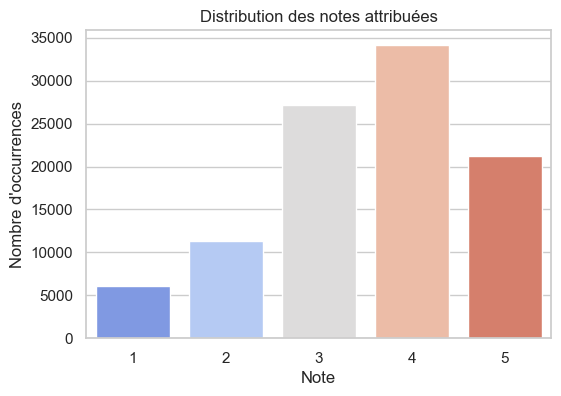

In [8]:
# Distribution des notes
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=ratings, x="rating", palette="coolwarm")
plt.title("Distribution des notes attribuées")
plt.xlabel("Note")
plt.ylabel("Nombre d'occurrences")
plt.show()

C:\Users\Medusa\AppData\Local\Temp\ipykernel_20056\795420633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_movies.index, x=top_movies.values, palette="viridis")


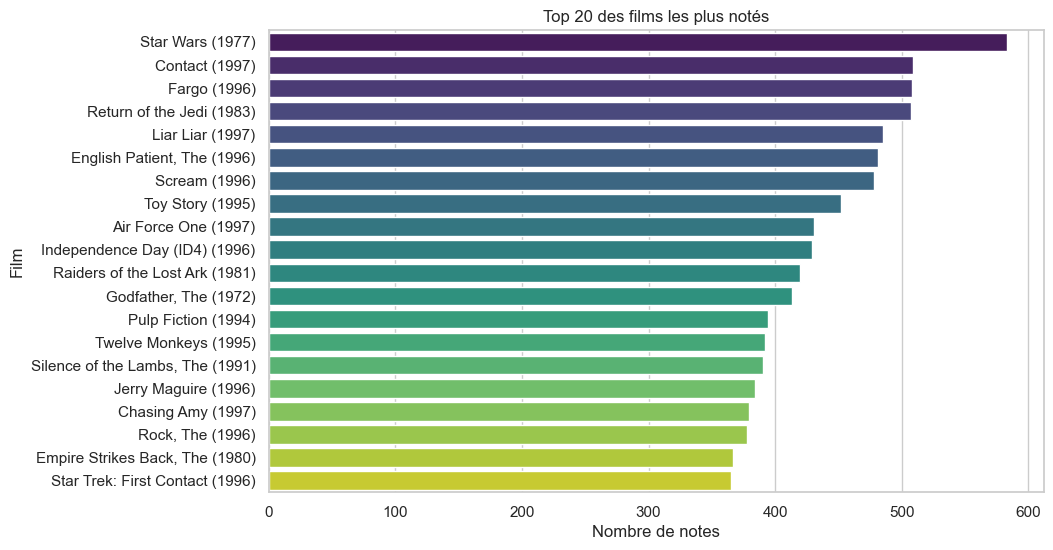

In [9]:
# Top 20 des films les plus notés
top_movies = ratings['title'].value_counts().head(20)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_movies.index, x=top_movies.values, palette="viridis")
plt.title("Top 20 des films les plus notés")
plt.xlabel("Nombre de notes")
plt.ylabel("Film")
plt.show()

C:\Users\Medusa\AppData\Local\Temp\ipykernel_20056\582994767.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.index, y=top_users.values, palette="magma")


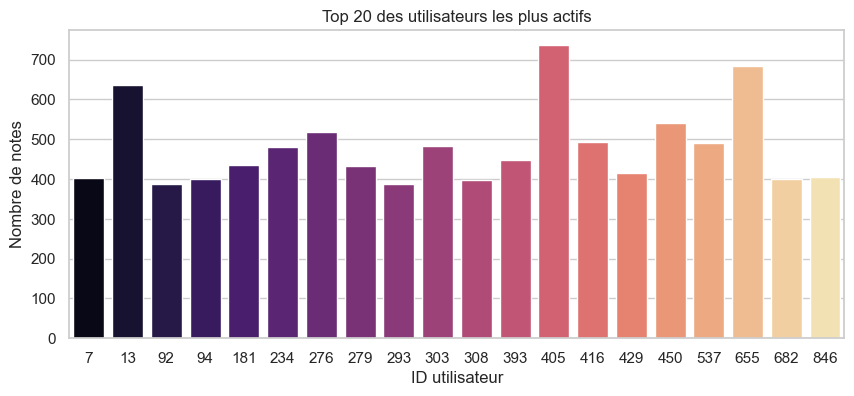

In [10]:
# Top 20 utilisateurs les plus actifs
top_users = ratings['user_id'].value_counts().head(20)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_users.index, y=top_users.values, palette="magma")
plt.title("Top 20 des utilisateurs les plus actifs")
plt.xlabel("ID utilisateur")
plt.ylabel("Nombre de notes")
plt.show()

C:\Users\Medusa\AppData\Local\Temp\ipykernel_20056\2645897320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="cubehelix")


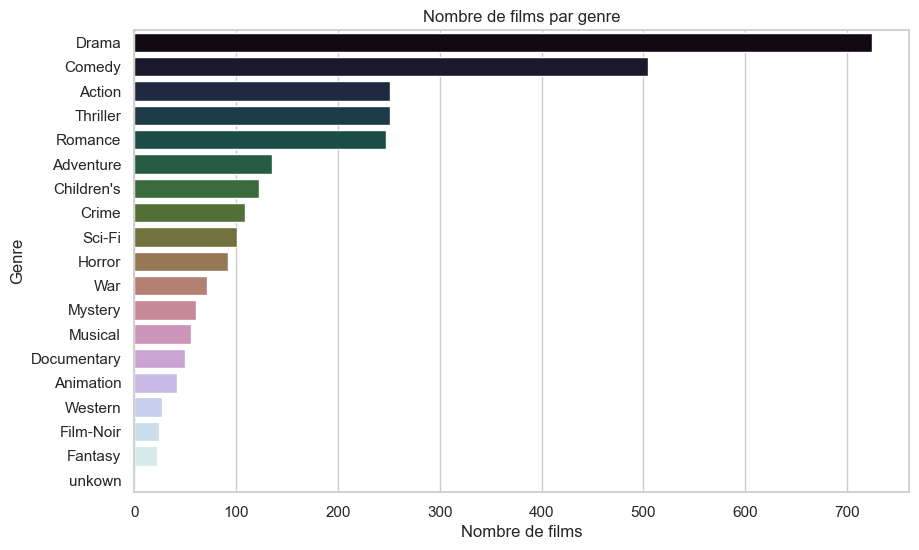

In [11]:
# Populatité par genre
genre_counts = movie_genres.drop(columns=["movie_id", "title"]).sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="cubehelix")
plt.title("Nombre de films par genre")
plt.xlabel("Nombre de films")
plt.ylabel("Genre")
plt.show()

In [12]:
# Filtrer Utilitsateurs avec trop peu de notes
# ⚙️ Seuil : utilisateurs avec < 20 notes
user_activity = ratings['user_id'].value_counts()
active_users = user_activity[user_activity >= 20].index

filtered_ratings = ratings[ratings['user_id'].isin(active_users)]
print(f"Utilisateurs actifs conservés : {len(active_users)} / {ratings['user_id'].nunique()}")

Utilisateurs actifs conservés : 943 / 943


In [13]:
# Filtrer les films avec trop peu de notes
# ⚙️ Seuil : films avec < 20 notes
movie_popularity = filtered_ratings['title'].value_counts()
popular_movies = movie_popularity[movie_popularity >= 20].index

filtered_ratings = filtered_ratings[filtered_ratings['title'].isin(popular_movies)]
print(f"Films populaires conservés : {len(popular_movies)} / {ratings['title'].nunique()}")

Films populaires conservés : 931 / 1664


In [14]:
# recalculer la matrice Utilisateurs x films filtrés
filtered_user_movie_matrix = filtered_ratings.pivot_table(
    index='user_id',
    columns='title',
    values='rating'
)
print("✅ Nouvelle matrice utilisateur × film :", filtered_user_movie_matrix.shape)

✅ Nouvelle matrice utilisateur × film : (943, 931)


In [15]:
# Mesurer la nouvelle sparsité
density_filtered = compute_density(filtered_user_movie_matrix)
sparsity_filtered = compute_sparsity(filtered_user_movie_matrix)

print(f"➡️ Taux de remplissage après filtrage : {density_filtered:.4f}")
print(f"➡️ Sparsité après filtrage : {sparsity_filtered:.4f}")

➡️ Taux de remplissage après filtrage : 0.1078
➡️ Sparsité après filtrage : 0.8922


In [16]:
# centrer les notes pour aider des futures algorythmes (Corrélation de pearson, SVD...)
# Centrer les notes de chaque utilisateur autour de sa moyenne
centered_matrix = filtered_user_movie_matrix.sub(filtered_user_movie_matrix.mean(axis=1), axis=0)
centered_matrix.head()

title,101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),"39 Steps, The (1935)",8 1/2 (1963),Absolute Power (1997),"Abyss, The (1989)",...,Wishmaster (1997),With Honors (1994),"Wizard of Oz, The (1939)",Wolf (1994),"Wrong Trousers, The (1993)",Wyatt Earp (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)"
user_id,,,,,,,,,,,,,,,,,,,,,
1,-1.670635,1.329365,NaN,NaN,-0.670635,0.329365,NaN,NaN,NaN,-0.670635,...,NaN,NaN,0.329365,NaN,1.329365,NaN,1.329365,-0.670635,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.762712,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,-0.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.974843,NaN,NaN,NaN,NaN,1.025157,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.025157,NaN,1.025157,NaN,NaN,NaN


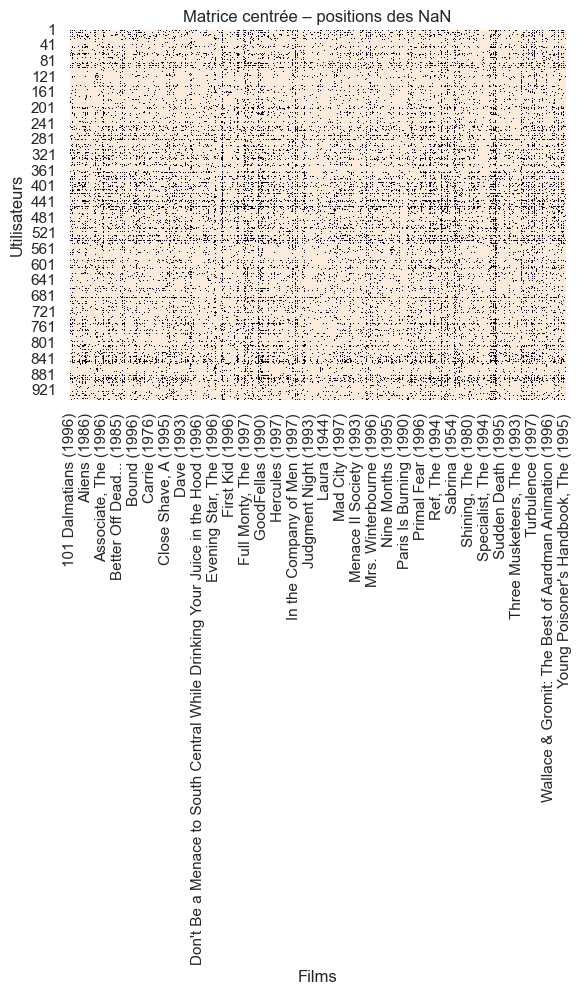

In [17]:
sns.heatmap(centered_matrix.isna(), cbar=False)
plt.title("Matrice centrée – positions des NaN")
plt.xlabel("Films")
plt.ylabel("Utilisateurs")
plt.show()

In [18]:
# recommandation by Pearson correlation
# chosen movie
movie_test = "Star Wars (1977)"

# launch the reco on the centered Matrix
recommandations = get_similar_movies_pearson(
    target_title=movie_test,
    user_movie_matrix=centered_matrix,
    min_common_ratings=20,  # pour éviter les artefacts
    top_n=10
)

# display result
recommandations.style.bar(subset=["correlation"], color='#5fba7d').format({"correlation": "{:.3f}"})

,title,correlation,num_common_ratings
0,"Empire Strikes Back, The (1980)",0.722,345
1,Return of the Jedi (1983),0.654,480
2,Blown Away (1994),0.527,27
3,Night Falls on Manhattan (1997),0.493,28
4,Meet John Doe (1941),0.489,24
5,Raiders of the Lost Ark (1981),0.486,380
6,Friday (1995),0.482,23
7,Brassed Off (1996),0.474,27
8,When We Were Kings (1996),0.436,37
9,Houseguest (1994),0.393,22


In [19]:
film_test = "Star Wars (1977)"
reco_cosine = get_similar_movies_cosine(
    target_title=film_test,
    user_movie_matrix=filtered_user_movie_matrix,  # version non centrée
    min_common_ratings=20,
    top_n=10
)

reco_cosine.style.bar(subset=["similarity"], color="#ffa600").format({"similarity": "{:.3f}"})

,title,similarity,num_common_ratings
0,Return of the Jedi (1983),0.884,480
1,Raiders of the Lost Ark (1981),0.765,380
2,"Empire Strikes Back, The (1980)",0.750,345
3,Toy Story (1995),0.735,381
4,"Godfather, The (1972)",0.697,357
5,Independence Day (ID4) (1996),0.693,362
6,Indiana Jones and the Last Crusade (1989),0.689,304
7,Fargo (1996),0.687,394
8,"Silence of the Lambs, The (1991)",0.676,335
9,Star Trek: First Contact (1996),0.674,316


In [ ]:
# Cosine and pearson comparison
film_test = "Star Wars (1977)"

reco_pearson = get_similar_movies_pearson(
    target_title=film_test,
    user_movie_matrix=filtered_user_movie_matrix,
    min_common_ratings=20,
    top_n=10
)

reco_cosine = get_similar_movies_cosine(
    target_title=film_test,
    user_movie_matrix=filtered_user_movie_matrix,
    min_common_ratings=20,
    top_n=10
)

from IPython.display import display, Markdown

display(Markdown("### 🔵 Recommandation Pearson"))
display(reco_pearson.style.bar(subset=["correlation"], color="#1f77b4"))

display(Markdown("### 🟢 Recommandation Cosine"))
display(reco_cosine.style.bar(subset=["similarity"], color="#2ca02c"))

merged = reco_pearson.merge(
    reco_cosine,
    on="title",
    how="outer",
    suffixes=("_pearson", "_cosine")
)

# Trier par score Pearson si dispo
merged = merged.sort_values(by="correlation", ascending=False)
merged.reset_index(drop=True, inplace=True)

display(Markdown("### 🔍 Comparaison croisée"))
display(merged.style.format({
    "correlation": "{:.3f}",
    "similarity": "{:.3f}",
    "num_common_ratings_pearson": "{:.0f}",
    "num_common_ratings_cosine": "{:.0f}"
}))

C:\Users\Medusa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Medusa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


NameError: name 'Markdown' is not defined